In [3]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test shape:\t',xtest.shape,ytest.shape)

Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test shape:	 (10000, 32, 32, 3) (10000, 1)


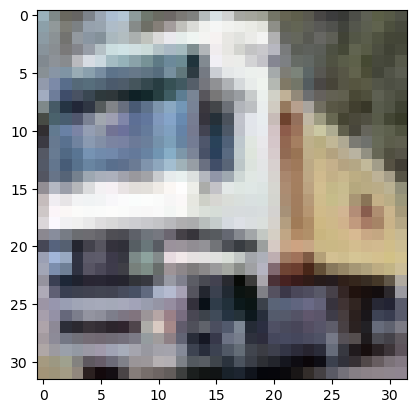

In [6]:

plt.imshow(xtrain[1],cmap='gray')

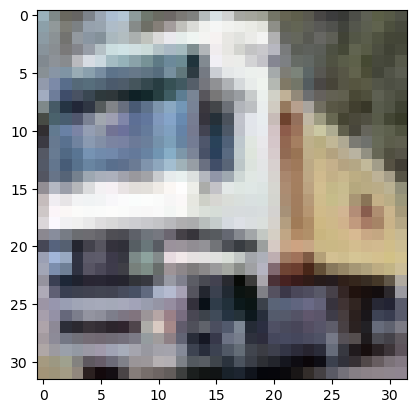

In [7]:
plt.imshow(xtrain[1],cmap='gray_r')

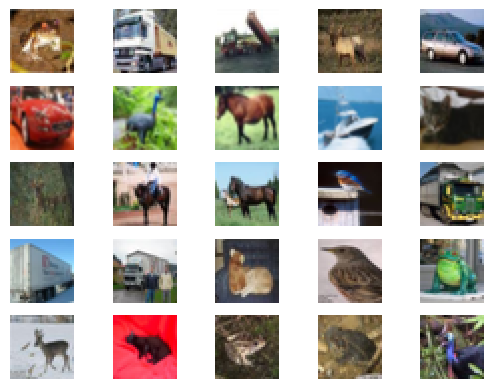

In [29]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
    
plt.show()

In [30]:
#import a;; required lib
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential

In [31]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()
   
    #1st conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',
                     input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    #2nd conv layer
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    #converting higher dimention to 1D
    model.add(Flatten())
    
    #output layer
    model.add(Dense(1,activation='sigmoid'))
    
    #compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    
    model.compile(loss='binary_crossentropy',optimizer=opt,
                  metrics=['accuracy'])
                  
    return model
                  
model=discriminator()
model.summary()
#plot the model   


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 8, 8, 64)          0         
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 4096)             

In [32]:
from numpy import expand_dims,ones,zeros

def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [33]:
load_real_samples()

array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [34]:

from numpy.random import rand,randint

def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]
    
    y=ones((n_samples,1))
    return x,y

In [35]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[0.12156863],
           [0.12156863],
           [0.16078432]],
 
          [[0.12156863],
           [0.13333334],
           [0.16862746]],
 
          [[0.10980392],
           [0.12941177],
           [0.16470589]],
 
          ...,
 
          [[0.03921569],
           [0.03921569],
           [0.03921569]],
 
          [[0.04313726],
           [0.04313726],
           [0.04313726]],
 
          [[0.03137255],
           [0.03137255],
           [0.03137255]]],
 
 
         [[[0.13725491],
           [0.14117648],
           [0.18039216]],
 
          [[0.14117648],
           [0.15294118],
           [0.1882353 ]],
 
          [[0.13333334],
           [0.14901961],
           [0.18431373]],
 
          ...,
 
          [[0.04313726],
           [0.04313726],
           [0.04313726]],
 
          [[0.04313726],
           [0.04313726],
           [0.04313726]],
 
          [[0.03137255],
           [0.03137255],
           [0.03137255]]],
 
 
         [[[0.16078432],

In [36]:


def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)
    
    x=x.reshape(n_samples,32,32,3)
    
  
    y=zeros((n_samples,1))
    
    return x,y

In [37]:
generate_fake_samples(10)

(array([[[[0.70639093, 0.57494666, 0.10338003],
          [0.48609192, 0.12164866, 0.15226338],
          [0.62902611, 0.80621055, 0.52467709],
          ...,
          [0.70648708, 0.03661097, 0.8342668 ],
          [0.23751592, 0.45399061, 0.46156574],
          [0.30616825, 0.21464218, 0.41016967]],
 
         [[0.94038456, 0.40538955, 0.13969776],
          [0.94846845, 0.77939676, 0.88898838],
          [0.61647984, 0.62237077, 0.71318168],
          ...,
          [0.91092434, 0.6784151 , 0.12782311],
          [0.91992419, 0.03155261, 0.42743042],
          [0.10180936, 0.84140131, 0.9953879 ]],
 
         [[0.23651002, 0.23662579, 0.58204649],
          [0.65484448, 0.99703763, 0.98217552],
          [0.26605398, 0.78993335, 0.66890018],
          ...,
          [0.31951655, 0.66804792, 0.40980297],
          [0.90284742, 0.38423034, 0.82292916],
          [0.85777946, 0.78150885, 0.41247058]],
 
         ...,
 
         [[0.87751899, 0.42427475, 0.06908464],
          [0.33788

In [38]:
def train_discriminative(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//2)
    
    for i in range(n_iter):
        
        xreal,yreal=generate_real_samples(dataset,half_batch)
        
        
        AA,real_acc=model.train_on_batch(xreal,yreal)
        
       
        xfake,yfake=generate_fake_samples(half_batch)
        
       
        BB,fake_acc=model.train_on_batch(xfake,yfake)
        
        
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))
        

In [39]:

model=discriminator()


dataset=load_real_samples()

In [40]:
train_discriminative(model,dataset)

>1 real=50% fake=28%
>2 real=58% fake=28%
>3 real=69% fake=28%
>4 real=56% fake=40%
>5 real=64% fake=34%
>6 real=53% fake=44%
>7 real=54% fake=44%
>8 real=52% fake=53%
>9 real=46% fake=45%
>10 real=43% fake=46%
>11 real=49% fake=56%
>12 real=51% fake=55%
>13 real=46% fake=59%
>14 real=40% fake=63%
>15 real=45% fake=70%
>16 real=40% fake=62%
>17 real=43% fake=62%
>18 real=32% fake=71%
>19 real=43% fake=77%
>20 real=39% fake=78%
>21 real=40% fake=80%
>22 real=41% fake=83%
>23 real=38% fake=86%
>24 real=30% fake=84%
>25 real=36% fake=90%
>26 real=27% fake=84%
>27 real=38% fake=88%
>28 real=42% fake=92%
>29 real=40% fake=91%
>30 real=34% fake=91%
>31 real=36% fake=89%
>32 real=34% fake=88%
>33 real=37% fake=94%
>34 real=28% fake=96%
>35 real=36% fake=98%
>36 real=25% fake=97%
>37 real=42% fake=99%
>38 real=30% fake=97%
>39 real=36% fake=97%
>40 real=30% fake=96%
>41 real=37% fake=100%
>42 real=38% fake=100%
>43 real=47% fake=98%
>44 real=34% fake=99%
>45 real=38% fake=98%
>46 real=34% fake

In [42]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def generator(latent_dim):
    model = Sequential()
    
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [21]:

latent_dim = 100

model = generator(latent_dim)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_5 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

In [43]:

import numpy as np
from numpy.random import randn

def generate_latent_points(latent_dim, n_samples):
    
    x_input = randn(latent_dim * n_samples)
    
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [44]:

def generate_fake_samples(g_model, latent_dim, n_samples):
   
    x_input = generate_latent_points(latent_dim, n_samples)
    
    X = g_model.predict(x_input)
   
    y = zeros((n_samples, 1))
    return X, y

1/1 [==============================] - 0s 304ms/step


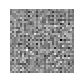

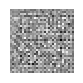

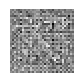

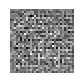

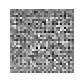

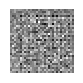

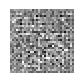

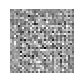

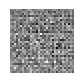

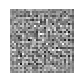

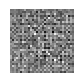

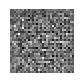

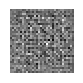

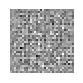

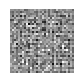

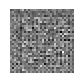

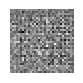

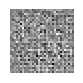

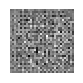

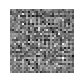

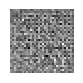

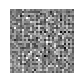

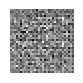

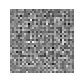

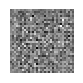

In [45]:

latent_dim = 100

model = generator(latent_dim)

n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)

for i in range(n_samples):
   
    plt.subplot(5, 5, 1 + i)
   
    plt.axis('off')
    
    plt.imshow(x[i, :, :, 0], cmap='gray_r')
    
    plt.show()